In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [71]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [73]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

In [74]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


([<matplotlib.patches.Wedge at 0x7f8a40723f90>,
 [Text(-0.3925749350994583, 1.0275626113924428, 'Died'),
  Text(0.3925750313068116, -1.0275625746369201, 'Survived')],
 [Text(-0.21413178278152267, 0.5604886971231505, '62%'),
  Text(0.21413183525826085, -0.5604886770746836, '38%')])

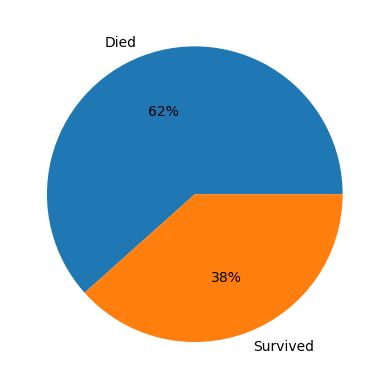

In [75]:
num_people_survived = train_df.Survived.value_counts()[1]
num_people_died = train_df.Survived.value_counts()[0]
plt.pie([num_people_died, num_people_survived], labels=['Died', 'Survived'], autopct='%1.0f%%')

In [38]:
train_df['Sex'] = (train_df['Sex'] == 'male').astype(int)
train_y = train_df['Survived']
train_df = train_df.drop(columns=['Name','Ticket','Cabin','Embarked','Fare','Survived'],axis=1)
train_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.0,1,0
1,2,1,0,38.0,1,0
2,3,3,0,26.0,0,0
3,4,1,0,35.0,1,0
4,5,3,1,35.0,0,0
5,6,3,1,NaN,0,0
6,7,1,1,54.0,0,0
7,8,3,1,2.0,3,1
8,9,3,0,27.0,0,2
9,10,2,0,14.0,1,0


In [39]:
train_y.head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [41]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,359309,8.0500,NaN,S


In [43]:
test_df['Sex'] = (test_df['Sex'] == 'male').astype(int)
test_df = test_df.drop(columns=['Name','Ticket','Cabin','Embarked','Fare'],axis=1)
test_df.head(10)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,0,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,0,22.0,1,1
5,897,3,0,14.0,0,0
6,898,3,0,30.0,0,0
7,899,2,0,26.0,1,1
8,900,3,0,18.0,0,0
9,901,3,0,21.0,2,0


In [48]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

In [49]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
train_df.fillna(pd.DataFrame.median(train_df['Age']),inplace=True)

In [51]:
train_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [53]:
lr = LogisticRegression()
X_scaled = preprocessing.StandardScaler().fit(train_df).transform(train_df)

In [54]:
lr.fit(X_scaled, train_y)

LogisticRegression()

In [58]:
test_df.isnull().sum()
test_df.fillna(pd.DataFrame.median(test_df['Age']),inplace=True)

In [68]:
predict_lr = lr.predict(train_df)
accuracy_score(train_y, predict_lr)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6127946127946128

In [63]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predict_lr})
output.to_csv("submission.csv", index=False)
print("Your submission is successfull. congrats!")

Your submission is successfull. congrats!


In [64]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(train_df, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(train_df)
y_pred_test = classifier.predict(test_df)
accuracy_score(train_y, y_pred)

0.9730639730639731

In [70]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': y_pred_test})
output.to_csv("submission_rf.csv", index=False)

Your submission is successfull. congrats!
